In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
# Examine dataframe

df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Let's split into X and y, normalize X

y = df_train['label'].values
X = df_train.drop(columns='label').values / 255.0

In [4]:
# Reshape X to 28,28,1 for the convolutional layer

X = X.reshape(-1,28,28,1)

In [5]:
# Create data augmentation layer

import tensorflow as tf 
from tensorflow.keras import layers, models

data_augmentation = models.Sequential([
    layers.RandomRotation(0.1),  # Randomly rotate
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),  # Randomly shift
    # layers.RandomZoom(0.1),  # Randomly zoom
    # layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip
])

In [6]:
# Define the model architecture

model = tf.keras.models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    data_augmentation,  # Adding the data augmentation layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='linear')  # Have the softmax function in the loss layer with from_logits=True
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [8]:
# Fit the model

history = model.fit(
    X,y,
    epochs=30,
    validation_split = 0.1
)

Epoch 1/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7020 - loss: 0.9063 - val_accuracy: 0.9555 - val_loss: 0.1377
Epoch 2/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9216 - loss: 0.2522 - val_accuracy: 0.9762 - val_loss: 0.0774
Epoch 3/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9413 - loss: 0.1897 - val_accuracy: 0.9743 - val_loss: 0.0786
Epoch 4/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9506 - loss: 0.1577 - val_accuracy: 0.9693 - val_loss: 0.0930
Epoch 5/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9547 - loss: 0.1444 - val_accuracy: 0.9762 - val_loss: 0.0716
Epoch 6/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9607 - loss: 0.1262 - val_accuracy: 0.9762 - val_loss: 0.0651
Epoch 7/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.9632 - loss: 0.1163 - val_accuracy: 0.9788 - val_loss: 0.0591
Epoch 8/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9692 -

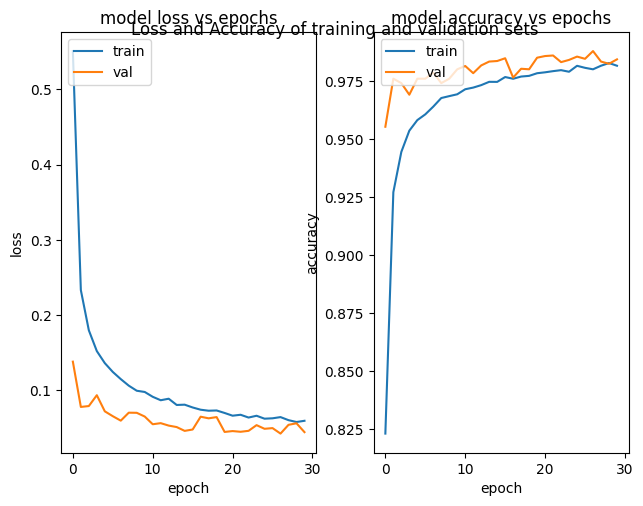

In [9]:
# Plot loss and accuracy
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.tight_layout()
fig.suptitle('Loss and Accuracy of training and validation sets')
ax1.plot((history.history['loss']))
ax1.plot((history.history['val_loss']))
ax1.set_title('model loss vs epochs')
ax1.set(ylabel='loss', xlabel='epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot((history.history['accuracy']))
ax2.plot((history.history['val_accuracy']))
ax2.set_title('model accuracy vs epochs')
ax2.set(ylabel='accuracy', xlabel='epoch')
ax2.legend(['train', 'val'], loc='upper left')



This looks good

# Predictions

In [10]:
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Reshape and normalize df_test

X_test = (df_test.values / 255.0).reshape(-1,28,28,1)

In [12]:
predictions = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [13]:
predicted_labels = np.argmax(predictions, axis=1)

In [14]:
predicted_labels

array([2, 0, 9, ..., 3, 9, 2])

In [15]:
submission = pd.DataFrame(
    {"ImageId": np.arange(1, len(predicted_labels) + 1), "Label": predicted_labels}
)

submission.to_csv("submission.csv", index=False)
print("Submission file created.")

Submission file created.
